## -- Hypotheses & Questions about the Data --
* Without any true analysis (yet), i have a hunch that churn and monthly_charges have a postive correlation
* i also think that accounts with multiple lines will have a higher probability of churn. more users sounds like more opportunities to find faults in the services.
* it would be ideal to find a specific service (such as an internet service or phone line) with high churn, because as a business, there's potential for improvement. 
* would those without tech support be more likely to churn? i thought tech support was an obvious given! yikes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath = '/Users/shaneypeterson/Desktop/2025.03.08 - Telecomm Churn Project/customer_churn_telecom_services.csv'

In [3]:
df = pd.read_csv(filepath)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# before going further, let's convert column names to snake_case for better legibility

cols = df.columns
cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
import re

def snake_case(s):
    return re.sub(r'(?<!^)(?=[A-Z])', '_', s).lower()

In [6]:
snake_case_cols = [snake_case(col) for col in cols]

In [7]:
df.columns = snake_case_cols
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## -- Data Types & Basic Info --

In [8]:
# Data Types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   senior_citizen     7043 non-null   int64  
 2   partner            7043 non-null   object 
 3   dependents         7043 non-null   object 
 4   tenure             7043 non-null   int64  
 5   phone_service      7043 non-null   object 
 6   multiple_lines     7043 non-null   object 
 7   internet_service   7043 non-null   object 
 8   online_security    7043 non-null   object 
 9   online_backup      7043 non-null   object 
 10  device_protection  7043 non-null   object 
 11  tech_support       7043 non-null   object 
 12  streaming_t_v      7043 non-null   object 
 13  streaming_movies   7043 non-null   object 
 14  contract           7043 non-null   object 
 15  paperless_billing  7043 non-null   object 
 16  payment_method     7043 

In [ ]:
# remove 11 rows w null values. 11/7043 = 0.156% of the data, so its safe to remove

len(df[df.total_charges.isnull()])

11

In [10]:
df.dropna(subset=['total_charges'], inplace=True)

print(df['total_charges'].isnull().sum())

0


In [11]:
# Get unique values

for column in df.select_dtypes(include='object').columns:
    unique_values = df[column].unique()
    print(f"-- Unique values in column '{column}':")
    print(unique_values)

-- Unique values in column 'gender':
['Female' 'Male']
-- Unique values in column 'partner':
['Yes' 'No']
-- Unique values in column 'dependents':
['No' 'Yes']
-- Unique values in column 'phone_service':
['No' 'Yes']
-- Unique values in column 'multiple_lines':
['No phone service' 'No' 'Yes']
-- Unique values in column 'internet_service':
['DSL' 'Fiber optic' 'No']
-- Unique values in column 'online_security':
['No' 'Yes' 'No internet service']
-- Unique values in column 'online_backup':
['Yes' 'No' 'No internet service']
-- Unique values in column 'device_protection':
['No' 'Yes' 'No internet service']
-- Unique values in column 'tech_support':
['No' 'Yes' 'No internet service']
-- Unique values in column 'streaming_t_v':
['No' 'Yes' 'No internet service']
-- Unique values in column 'streaming_movies':
['No' 'Yes' 'No internet service']
-- Unique values in column 'contract':
['Month-to-month' 'One year' 'Two year']
-- Unique values in column 'paperless_billing':
['Yes' 'No']
-- Unique

In [12]:
# Get Statistics

df.describe()

,senior_citizen,tenure,monthly_charges,total_charges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


-- Notes --
* senior_citizen is encoded already. 
* columns that should be encoded are:
    * gender, partner, dependents, phone_service, multiple_lines, internet_service, online_security, online_backup, device_protection, tech_support, streaming_t_v, streaming_movies, contract, paperless_billing, payment_method, churn


## -- Distribution Analysis --

### -- Numerical Columns --

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(df, columns, bins=10, figsize=(15, 10)):
    """
    Plots histograms for the specified numerical columns of a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of column names to plot histograms for.
    bins (int): Number of bins for the histograms.
    figsize (tuple): Size of the figure.
    """
    num_columns = len(columns)
    fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=figsize)
    
    for i, column in enumerate(columns):
        sns.histplot(df[column], bins=bins, ax=axes[i])
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

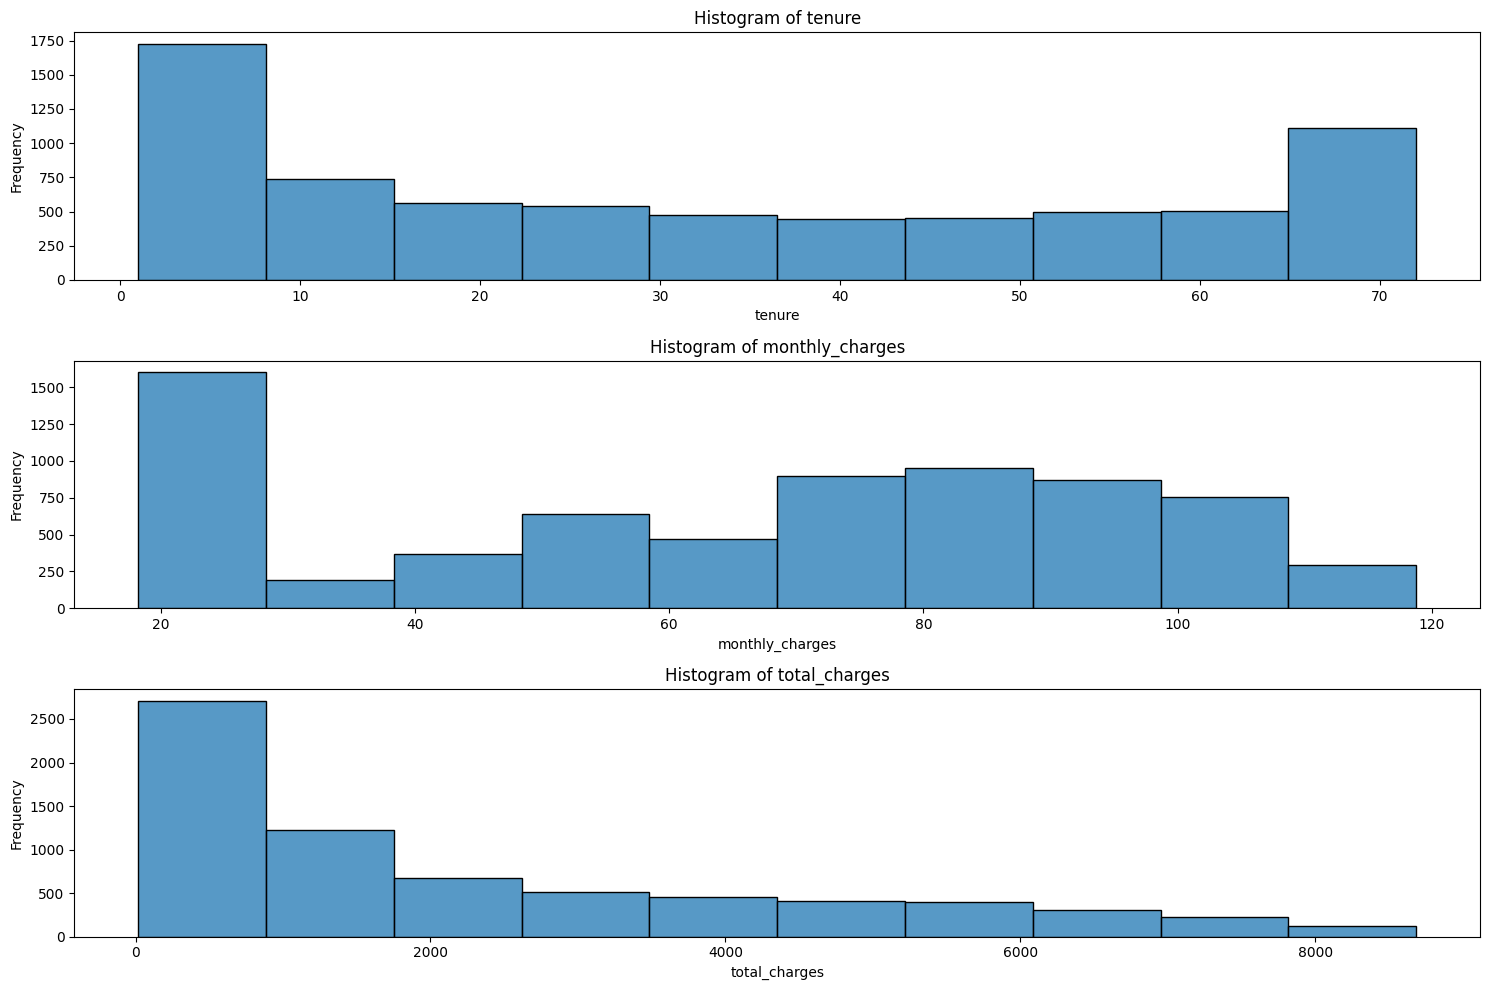

In [14]:
numerical_columns = df.select_dtypes(include=['number']).columns.to_list()
numerical_columns = numerical_columns[1:] # remove senior_citizen column
plot_histograms(df, numerical_columns)

-- Notes --
* senior_citizen needs pie chart, not histogram
* tenure's distribution gravitates towards the bookends: most customers have been members for under 10 years (get more specific numbers) or for more than 65 years
* monthly_charges has the highest frequency at the low end - around $20-30. The less-frequent charges form a left-skewed distribution between $30 and $120.
* total_charges is a right_skewed distribution - from $0 to $8700.

In [15]:
def plot_boxplots(df, columns, figsize=(15, 10)):
    """
    Plots box plots for the specified numerical columns of a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of column names to plot box plots for.
    figsize (tuple): Size of the figure.
    """
    num_columns = len(columns)
    fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=figsize)
    
    for i, column in enumerate(columns):
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Box Plot of {column}')
        axes[i].set_xlabel(column)
    
    plt.tight_layout()
    plt.show()

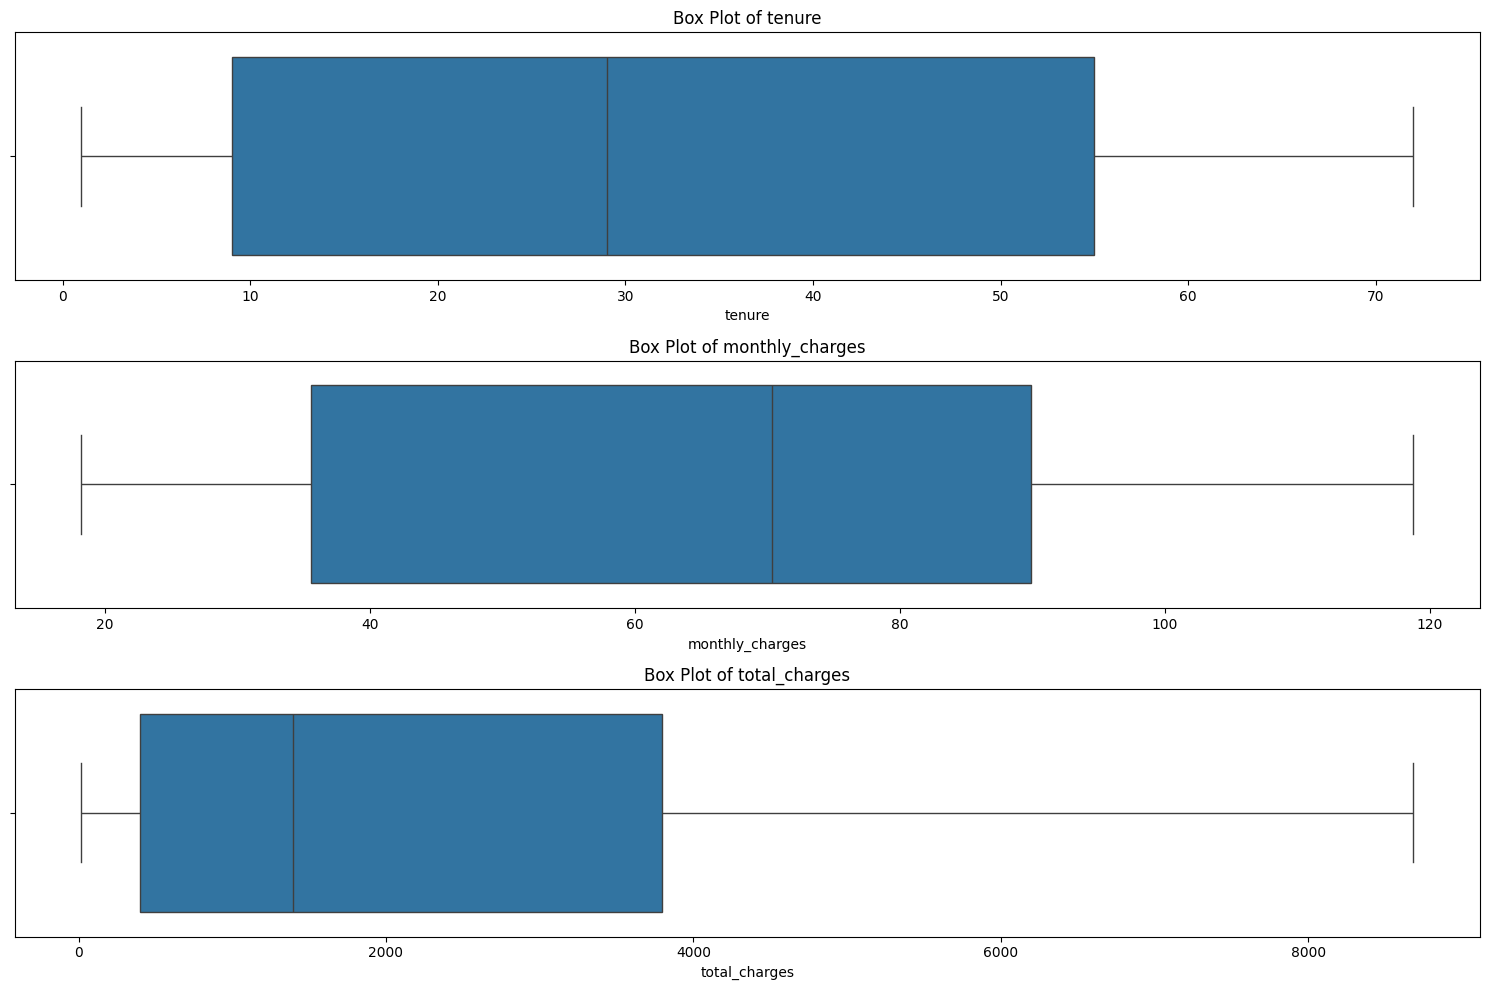

In [16]:
plot_boxplots(df, numerical_columns)

In [17]:
def plot_density_plots(df, columns, figsize=(15, 10)):
    """
    Plots density plots (KDE) for the specified numerical columns of a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of column names to plot density plots for.
    figsize (tuple): Size of the figure.
    """
    num_columns = len(columns)
    fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=figsize)
    
    for i, column in enumerate(columns):
        sns.kdeplot(df[column], ax=axes[i], shade=True)
        axes[i].set_title(f'Density Plot of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Density')
    
    plt.tight_layout()
    plt.show()

/var/folders/3h/wry2g1pj18qgw40b52yh7d580000gp/T/ipykernel_33500/1693756995.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], ax=axes[i], shade=True)
/var/folders/3h/wry2g1pj18qgw40b52yh7d580000gp/T/ipykernel_33500/1693756995.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], ax=axes[i], shade=True)
/var/folders/3h/wry2g1pj18qgw40b52yh7d580000gp/T/ipykernel_33500/1693756995.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], ax=axes[i], shade=True)


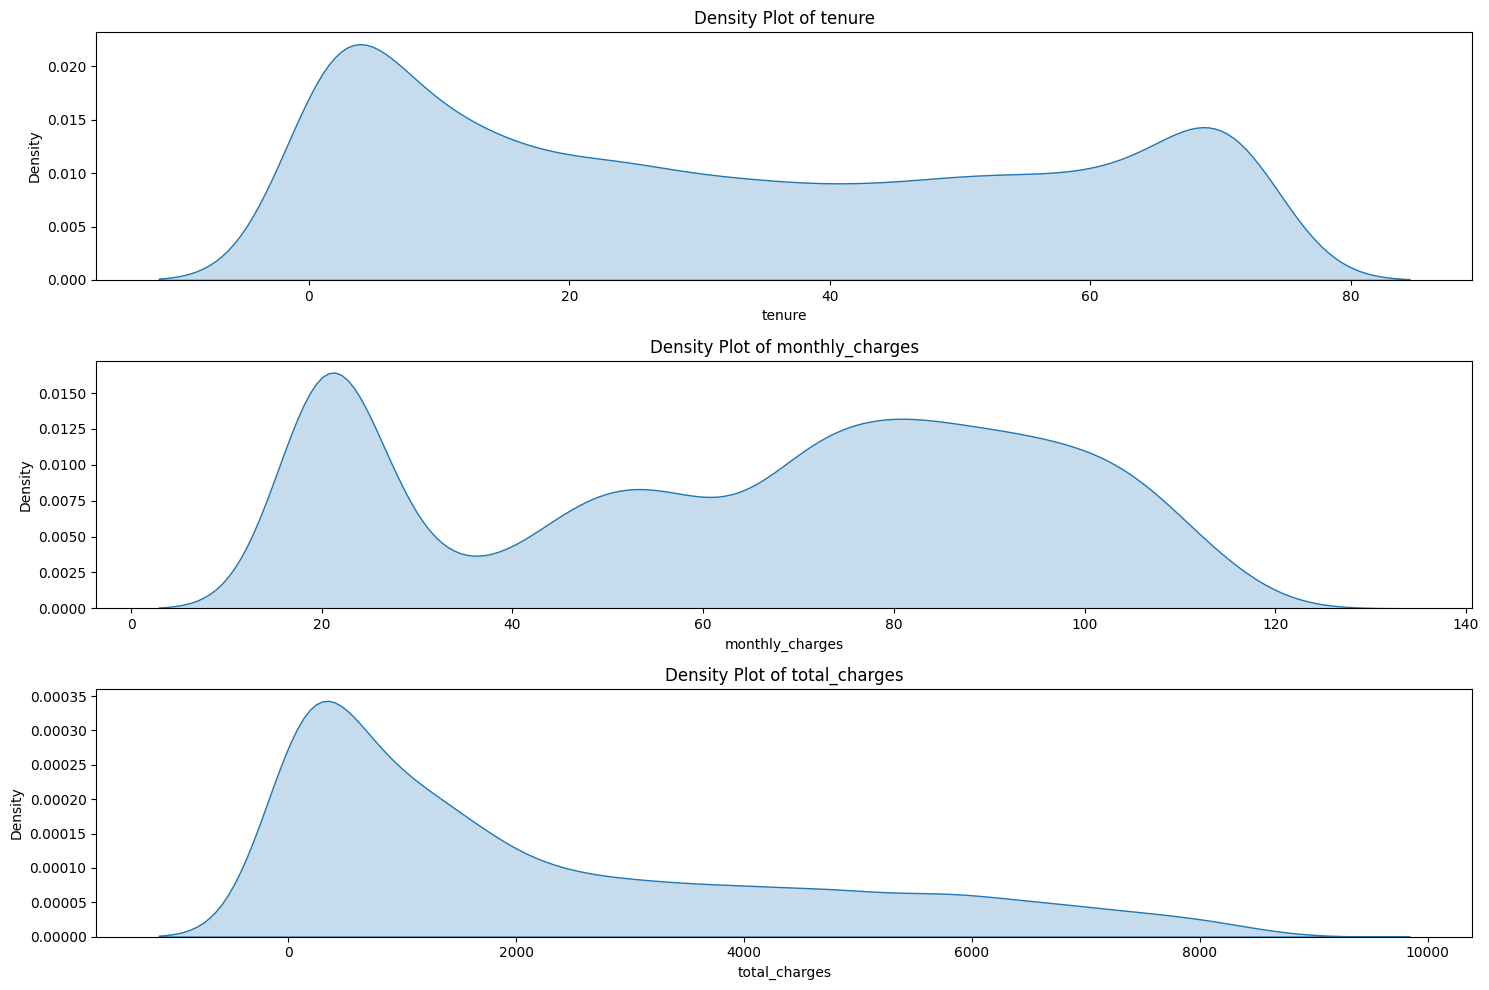

In [18]:
plot_density_plots(df, numerical_columns)

In [19]:
import scipy.stats as stats

def plot_qq_plots(df, columns, figsize=(15, 10)):
    """
    Plots Q-Q plots for the specified numerical columns of a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of column names to plot Q-Q plots for.
    figsize (tuple): Size of the figure.
    """
    num_columns = len(columns)
    fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=figsize)
    
    for i, column in enumerate(columns):
        stats.probplot(df[column], dist="norm", plot=axes[i])
        axes[i].set_title(f'Q-Q Plot of {column}')
        axes[i].set_xlabel('Theoretical Quantiles')
        axes[i].set_ylabel('Sample Quantiles')
    
    plt.tight_layout()
    plt.show()

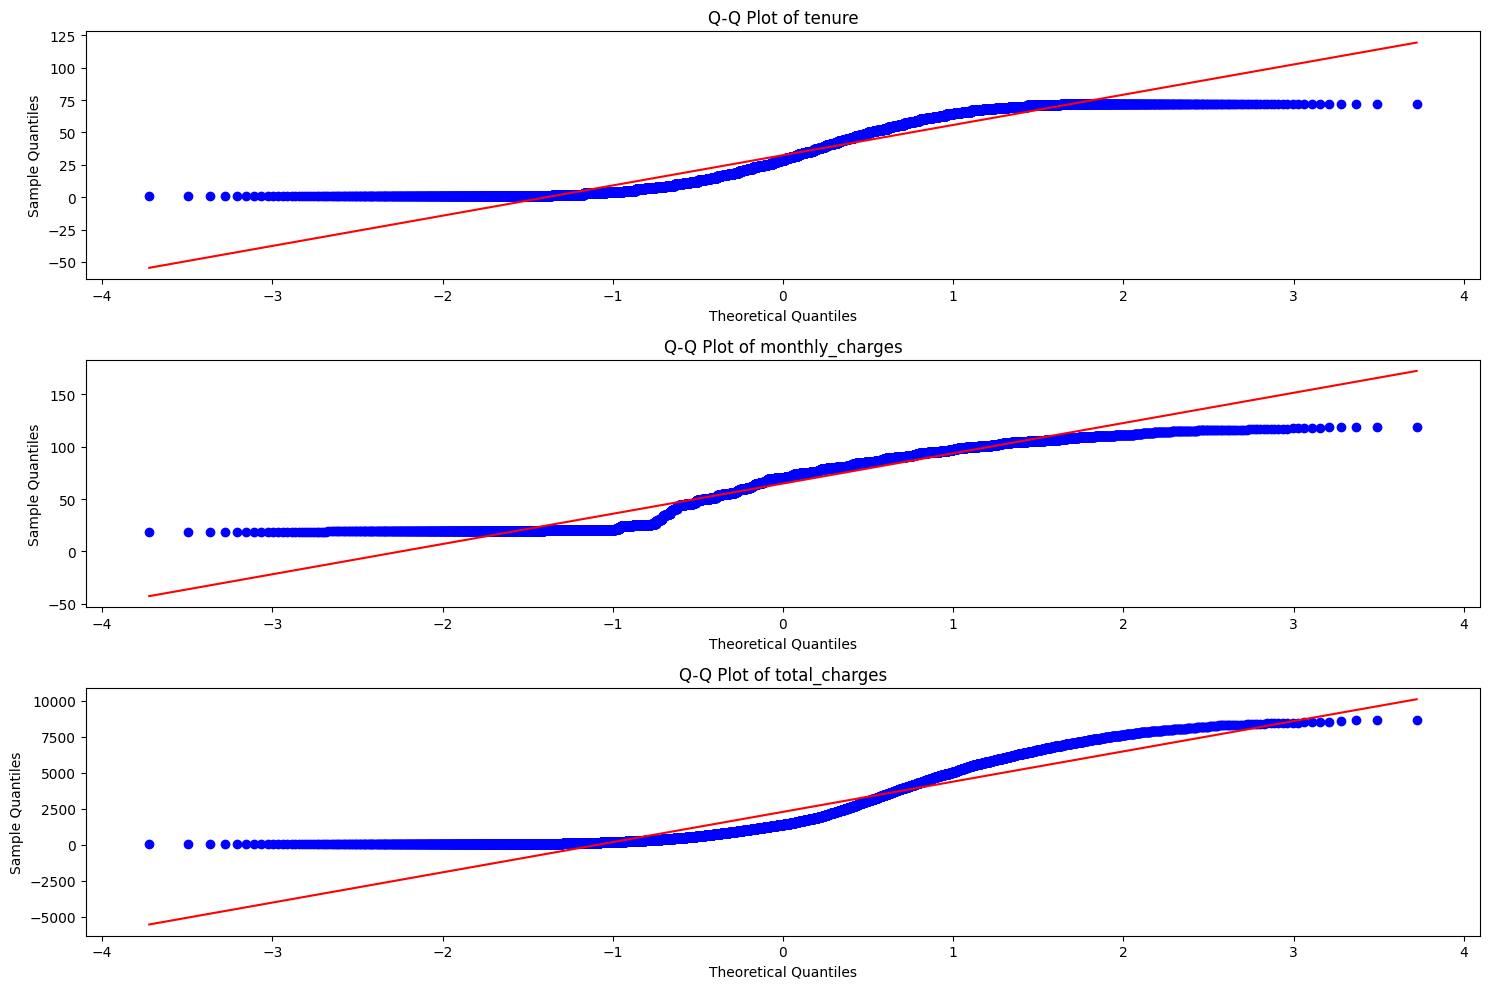

In [20]:
plot_qq_plots(df, numerical_columns)

In [21]:
def plot_categorical_columns(df, columns, figsize=(10, 6)):
    """
    Plots pie charts or horizontal bar charts for the specified categorical columns of a DataFrame.
    If a column has more than 4 unique values, a horizontal bar chart is plotted.
    Otherwise, a pie chart is plotted.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of column names to plot.
    figsize (tuple): Size of the figure.
    """
    for column in columns:
        unique_values = df[column].nunique()
        plt.figure(figsize=figsize)
        
        if unique_values > 4:
            sns.countplot(y=df[column], order=df[column].value_counts().index)
            plt.title(f'Horizontal Bar Chart of {column}')
            plt.xlabel('Count')
            plt.ylabel(column)
        else:
            df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
            plt.title(f'Pie Chart of {column}')
            plt.ylabel('')  # Hide the y-label for pie chart
        
        plt.tight_layout()
        plt.show()

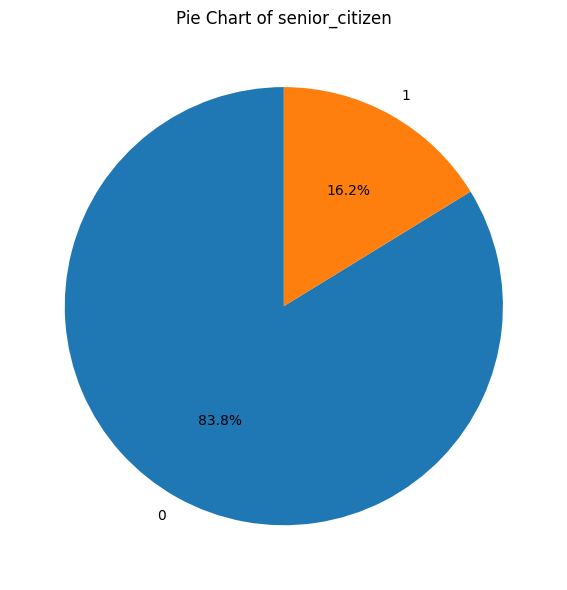

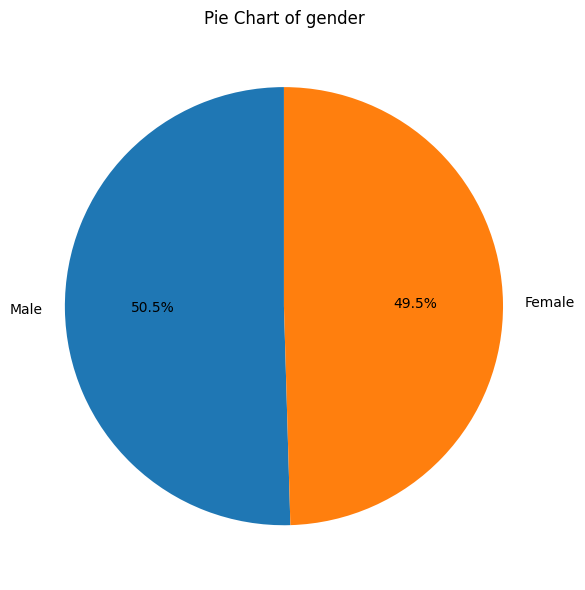

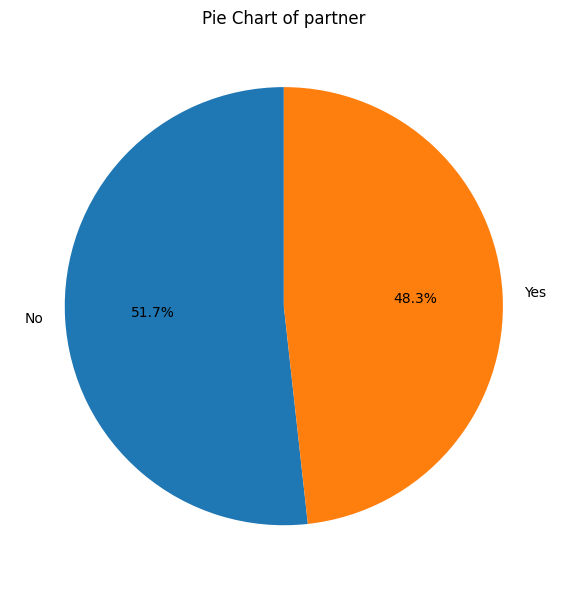

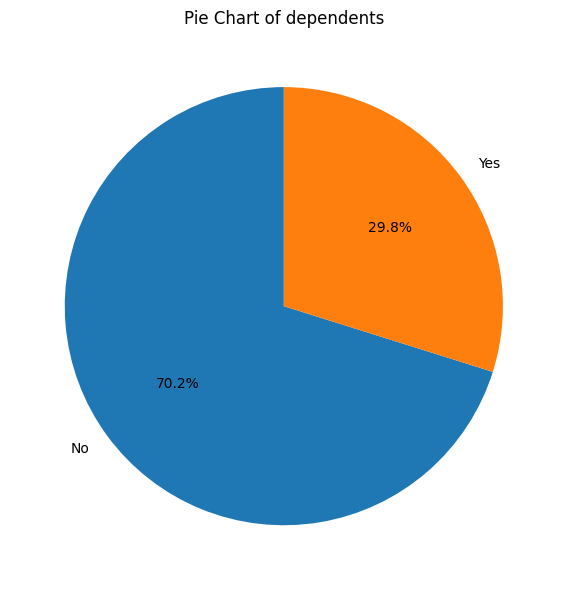

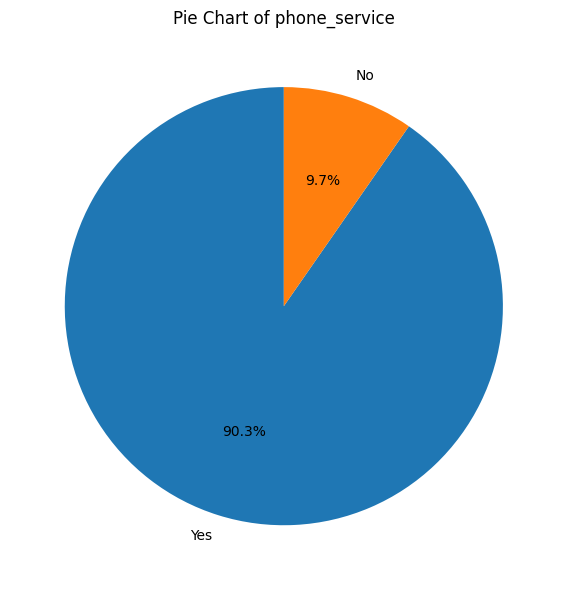

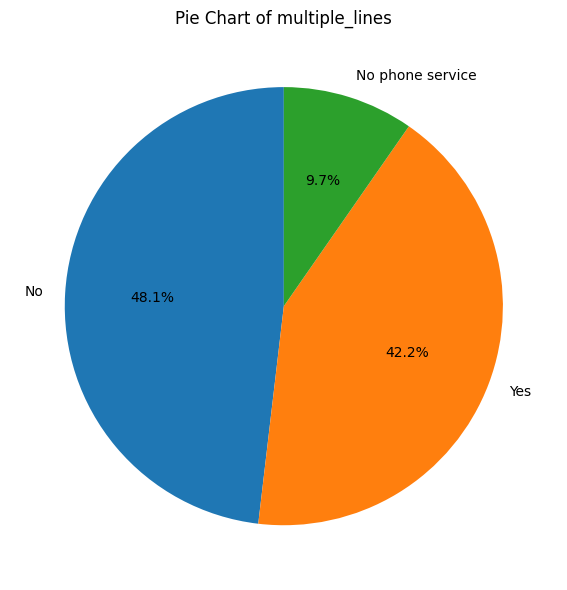

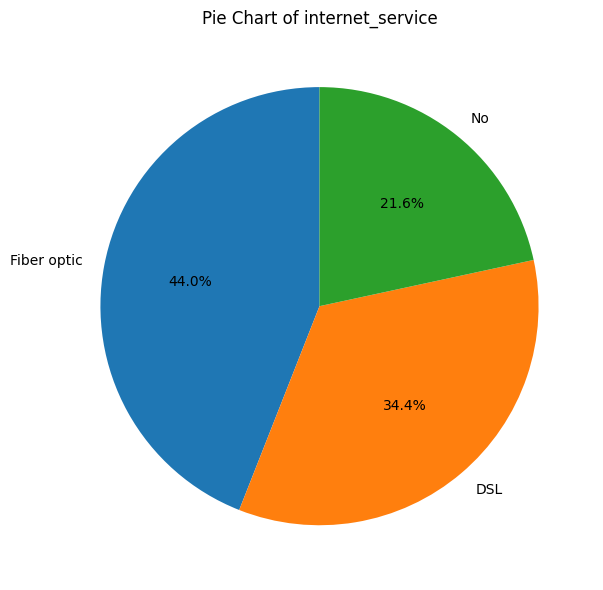

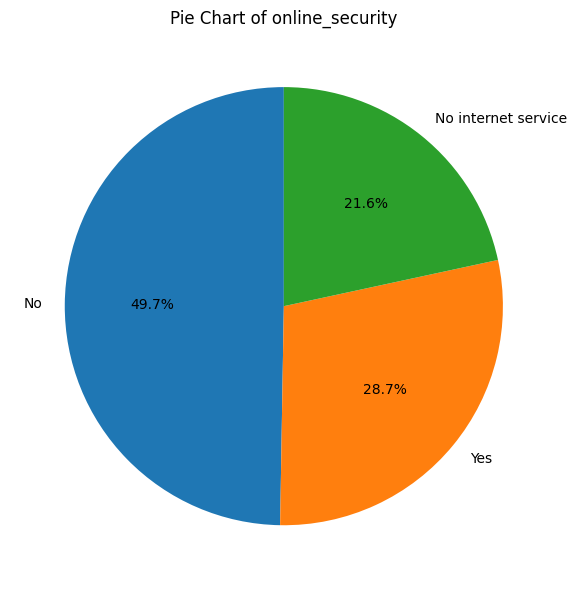

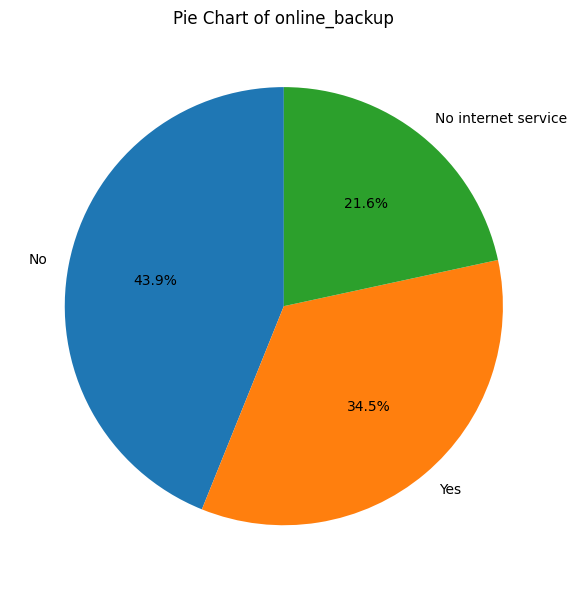

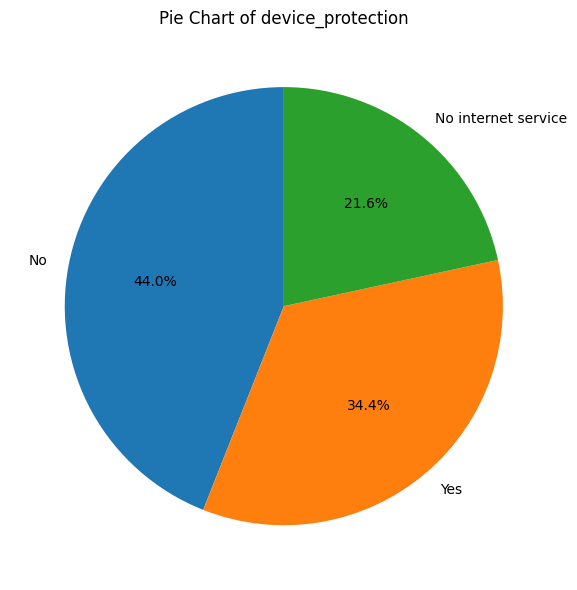

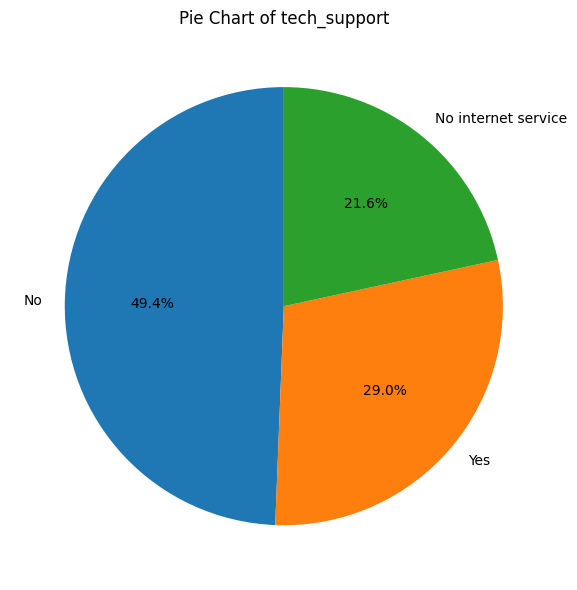

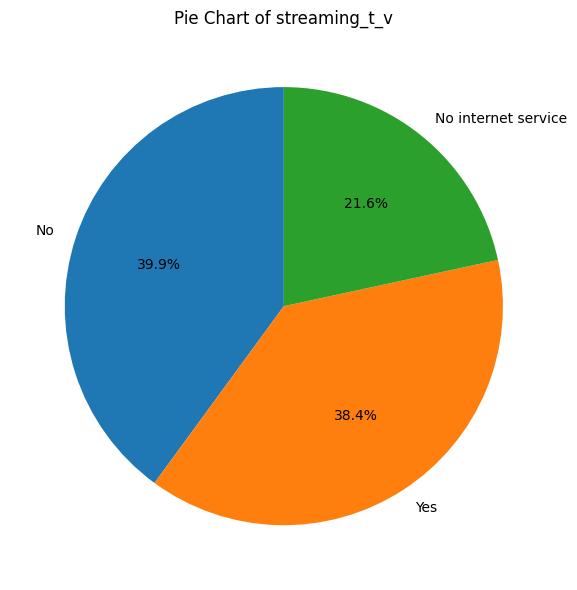

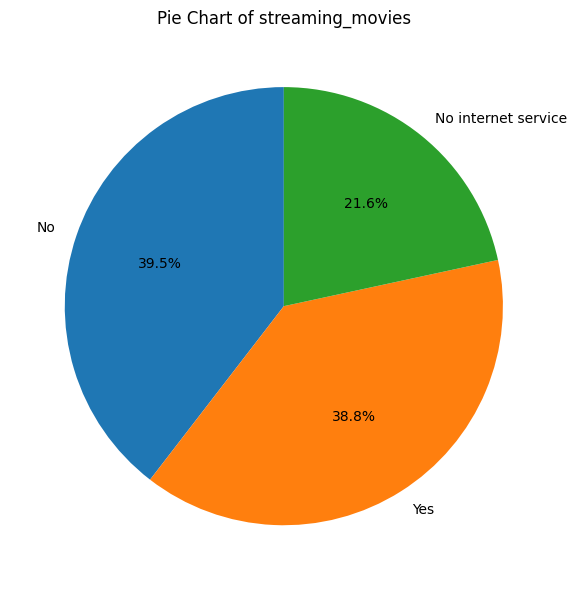

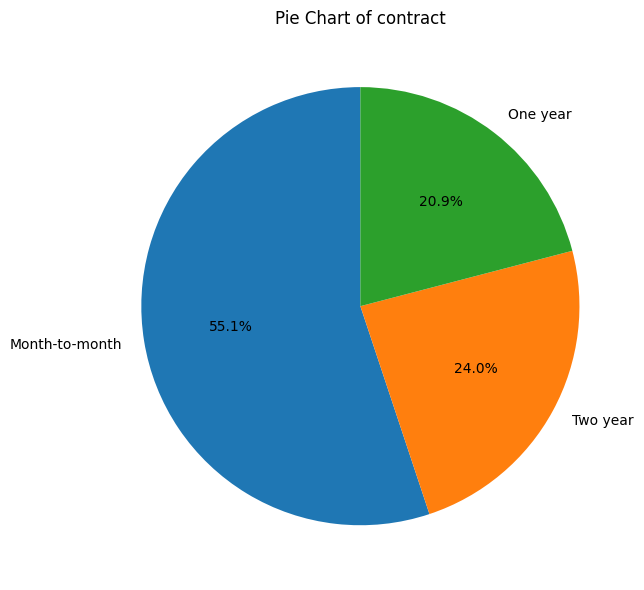

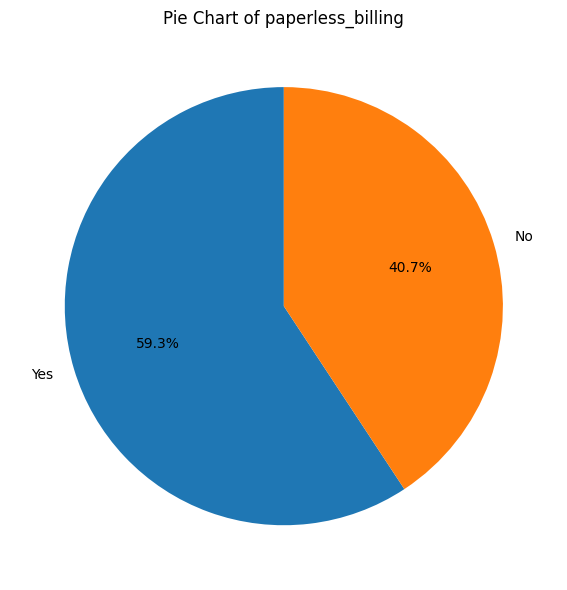

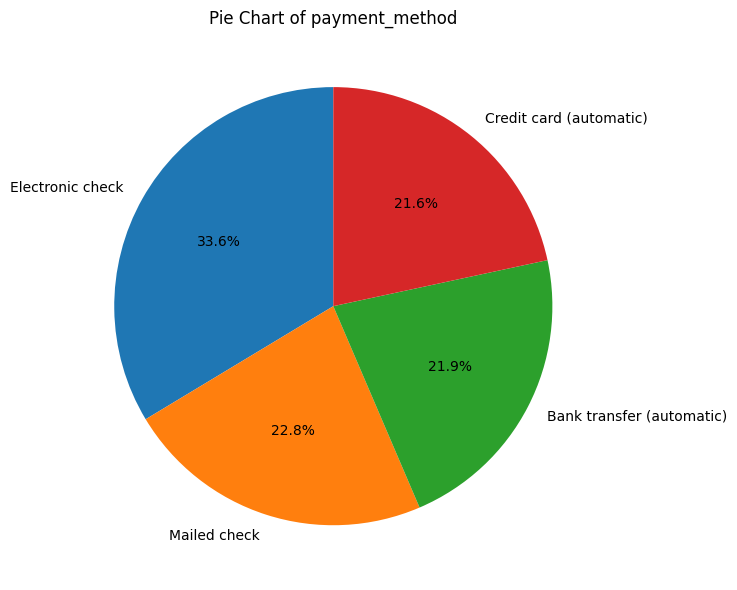

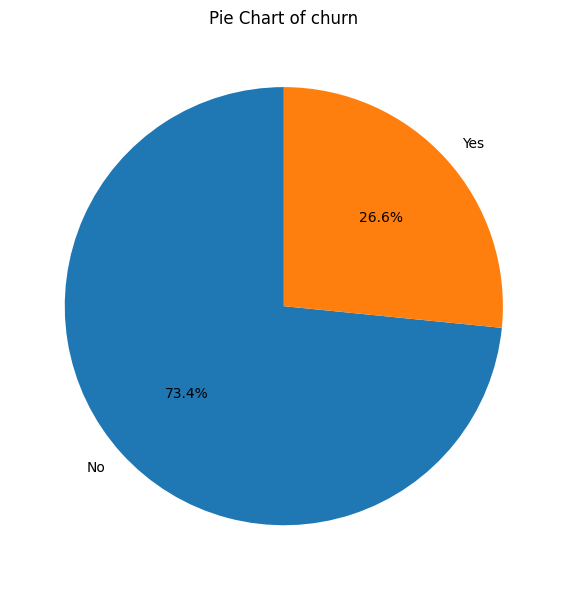

In [24]:
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()
categorical_columns.insert(0, 'senior_citizen') # add senior_citizen column
plot_categorical_columns(df, categorical_columns)

In [25]:
def display_frequency_tables(df, columns):
    """
    Displays frequency tables for the specified categorical columns of a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of column names to display frequency tables for.
    """
    for column in columns:
        frequency_table = df[column].value_counts().reset_index()
        frequency_table.columns = [column, 'Frequency']
        frequency_table['Percentage'] = (frequency_table['Frequency'] / len(df)) * 100
        print(f"Frequency Table for {column}:\n")
        print(frequency_table)
        print("\n" + "-"*50 + "\n")

In [26]:
display_frequency_tables(df, categorical_columns)

Frequency Table for senior_citizen:

   senior_citizen  Frequency  Percentage
0               0       5890   83.759954
1               1       1142   16.240046

--------------------------------------------------

Frequency Table for gender:

   gender  Frequency  Percentage
0    Male       3549   50.469283
1  Female       3483   49.530717

--------------------------------------------------

Frequency Table for partner:

  partner  Frequency  Percentage
0      No       3639   51.749147
1     Yes       3393   48.250853

--------------------------------------------------

Frequency Table for dependents:

  dependents  Frequency  Percentage
0         No       4933   70.150739
1        Yes       2099   29.849261

--------------------------------------------------

Frequency Table for phone_service:

  phone_service  Frequency  Percentage
0           Yes       6352    90.32992
1            No        680     9.67008

--------------------------------------------------

Frequency Table for mult

## -- Identify Potential Issues --

### -- Outliers --

In [27]:
df['tenure_zscore'] = np.abs(stats.zscore(df['tenure']))
print(df[df['tenure_zscore'] > 3])

Empty DataFrame
Columns: [gender, senior_citizen, partner, dependents, tenure, phone_service, multiple_lines, internet_service, online_security, online_backup, device_protection, tech_support, streaming_t_v, streaming_movies, contract, paperless_billing, payment_method, monthly_charges, total_charges, churn, tenure_zscore]
Index: []

[0 rows x 21 columns]


In [28]:
df['monthly_charges_zscore'] = np.abs(stats.zscore(df['monthly_charges']))
print(df[df['monthly_charges_zscore'] > 3])

Empty DataFrame
Columns: [gender, senior_citizen, partner, dependents, tenure, phone_service, multiple_lines, internet_service, online_security, online_backup, device_protection, tech_support, streaming_t_v, streaming_movies, contract, paperless_billing, payment_method, monthly_charges, total_charges, churn, tenure_zscore, monthly_charges_zscore]
Index: []

[0 rows x 22 columns]


In [29]:
df['total_charges_zscore'] = np.abs(stats.zscore(df['total_charges']))
print(df[df['total_charges_zscore'] > 3])

Empty DataFrame
Columns: [gender, senior_citizen, partner, dependents, tenure, phone_service, multiple_lines, internet_service, online_security, online_backup, device_protection, tech_support, streaming_t_v, streaming_movies, contract, paperless_billing, payment_method, monthly_charges, total_charges, churn, tenure_zscore, monthly_charges_zscore, total_charges_zscore]
Index: []

[0 rows x 23 columns]


In [30]:
def find_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[column] < q1 - 1.5 * iqr) | (df[column] > q3 + 1.5 * iqr)]
    return outliers

In [31]:
print(find_outliers_iqr(df, 'tenure'))

Empty DataFrame
Columns: [gender, senior_citizen, partner, dependents, tenure, phone_service, multiple_lines, internet_service, online_security, online_backup, device_protection, tech_support, streaming_t_v, streaming_movies, contract, paperless_billing, payment_method, monthly_charges, total_charges, churn, tenure_zscore, monthly_charges_zscore, total_charges_zscore]
Index: []

[0 rows x 23 columns]


In [32]:
print(find_outliers_iqr(df, 'monthly_charges'))

Empty DataFrame
Columns: [gender, senior_citizen, partner, dependents, tenure, phone_service, multiple_lines, internet_service, online_security, online_backup, device_protection, tech_support, streaming_t_v, streaming_movies, contract, paperless_billing, payment_method, monthly_charges, total_charges, churn, tenure_zscore, monthly_charges_zscore, total_charges_zscore]
Index: []

[0 rows x 23 columns]


In [33]:
print(find_outliers_iqr(df, 'total_charges'))

Empty DataFrame
Columns: [gender, senior_citizen, partner, dependents, tenure, phone_service, multiple_lines, internet_service, online_security, online_backup, device_protection, tech_support, streaming_t_v, streaming_movies, contract, paperless_billing, payment_method, monthly_charges, total_charges, churn, tenure_zscore, monthly_charges_zscore, total_charges_zscore]
Index: []

[0 rows x 23 columns]


Notes.
* No statistical outliers!

### -- Skewness --

In [34]:
from scipy.stats import skew

columns_to_check = ['tenure', 'monthly_charges', 'total_charges']

for col in columns_to_check:
    skewness = skew(df[col])
    print(f"Skewness of {col}: {skewness}")

Skewness of tenure: 0.23768011839839964
Skewness of monthly_charges: -0.22205554798978874
Skewness of total_charges: 0.9614373590490068


-- Notes --
* tenure = 0.24. approximately symmetrically distributed. 
* monthly_charges = -0.22. mild negative skew, but also approximately symmetrical.
* total_charges = 0.96. positive and close to 1. moderately right-skewed.

### -- Cardinality --

In [35]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"Cardinality of {col}: {df[col].nunique()}")

Cardinality of gender: 2
Cardinality of partner: 2
Cardinality of dependents: 2
Cardinality of phone_service: 2
Cardinality of multiple_lines: 3
Cardinality of internet_service: 3
Cardinality of online_security: 3
Cardinality of online_backup: 3
Cardinality of device_protection: 3
Cardinality of tech_support: 3
Cardinality of streaming_t_v: 3
Cardinality of streaming_movies: 3
Cardinality of contract: 3
Cardinality of paperless_billing: 2
Cardinality of payment_method: 4
Cardinality of churn: 2


In [37]:
# export

df.drop(['tenure_zscore', 'monthly_charges_zscore', 'total_charges_zscore'], axis=1, inplace=True)
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_t_v', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [38]:
# export

df.to_csv('/Users/shaneypeterson/Desktop/2025.03.08 - Telecomm Churn Project/churn_data_cleaned.csv', index=False)